# Proyecto 2
## María Lyzeth López Toxqui
Redes Neuronales

In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [2]:
DATASET_PATH = "/content/drive/MyDrive/shapes_5/"

In [3]:
#Importamos las librerías

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os

Se entrenó una red neuronal para clasificar imágenes. El dataset es de formas geométricas descargado de Kaggle desde https://www.kaggle.com/datasets/smeschke/four-shapes

In [7]:
def apply_filters(image):
    #Filtro Gaussiano para suavizar
    blurred = cv2.GaussianBlur(image, (5, 5), 0) #Definimos el filtro gaussiano

    #Filtro Sobel para detectar bordes
    sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3) #Definimos el filtro Sobel
    sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)
    sobel = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel = np.uint8(np.clip(sobel, 0, 255))

    return sobel

In [8]:
# Cargar imágenes
images = []
labels = []
class_names = []

for idx, class_name in enumerate(sorted(os.listdir(DATASET_PATH))):
    class_path = os.path.join(DATASET_PATH, class_name)
    if os.path.isdir(class_path):
        class_names.append(class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64, 64))
            filtered = apply_filters(img)
            images.append(filtered)
            labels.append(idx)

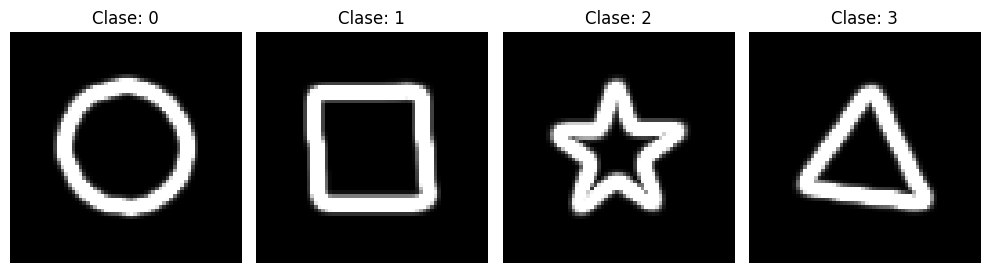

In [16]:
X = np.array(images).reshape(-1, 64, 64, 1) / 255.0
y = to_categorical(labels)

plt.figure(figsize=(10, 10))

shown_classes = set()
shown_indices = []

for idx, label_vec in enumerate(y):
    label = np.argmax(label_vec)  # convertir one-hot a entero para evitar un error
    if label not in shown_classes:
        shown_classes.add(label)
        shown_indices.append((idx, label))
    if len(shown_classes) == len(np.unique(np.argmax(y, axis=1))):
        break

for i, (idx, label) in enumerate(shown_indices):
    plt.subplot(1, len(shown_classes), i + 1)
    plt.imshow(X[idx], cmap='gray')
    plt.title(f"Clase: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # Cambia a la cantidad de clases que tengas
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 182ms/step - accuracy: 0.7887 - loss: 0.7151 - val_accuracy: 0.9803 - val_loss: 0.0666
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 193ms/step - accuracy: 0.9903 - loss: 0.0520 - val_accuracy: 1.0000 - val_loss: 0.0115
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 162ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 1.0000 - val_loss: 0.0019
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 7.9169e-04
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - accuracy: 1.0000 - loss: 6.1128e-04 - val_accuracy: 1.0000 - val_loss: 4.9373e-04
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 1.0000 - loss: 3.6267e-04 - val_accuracy: 1.0000 - val_loss: 4.3779e-04
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 241ms/step - accuracy: 1.0000 - loss: 2.995

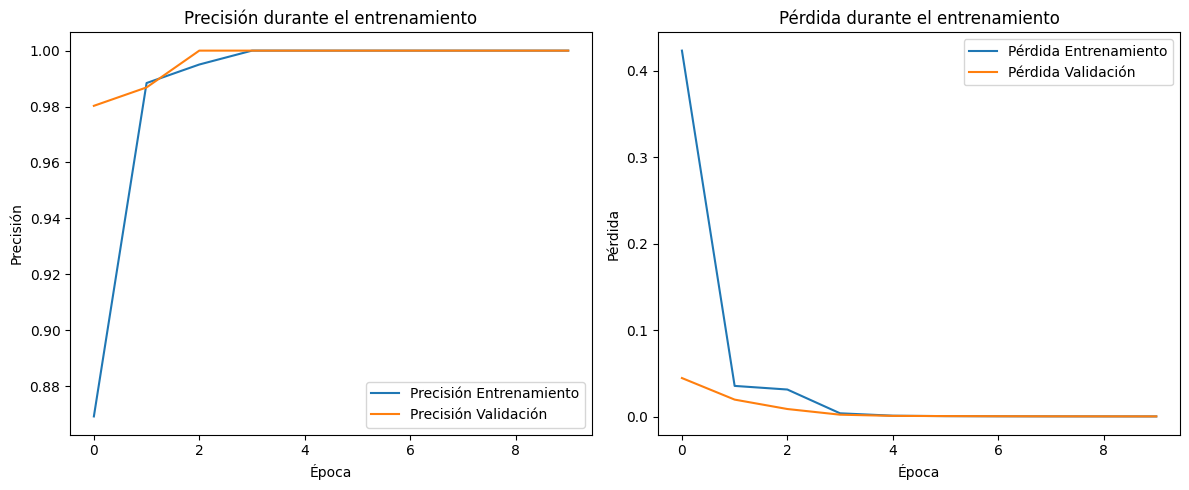

In [13]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Precisión Entrenamiento")
plt.plot(history.history['val_accuracy'], label="Precisión Validación")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.legend()
plt.title("Precisión durante el entrenamiento")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Pérdida Entrenamiento")
plt.plot(history.history['val_loss'], label="Pérdida Validación")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.legend()
plt.title("Pérdida durante el entrenamiento")

plt.tight_layout()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


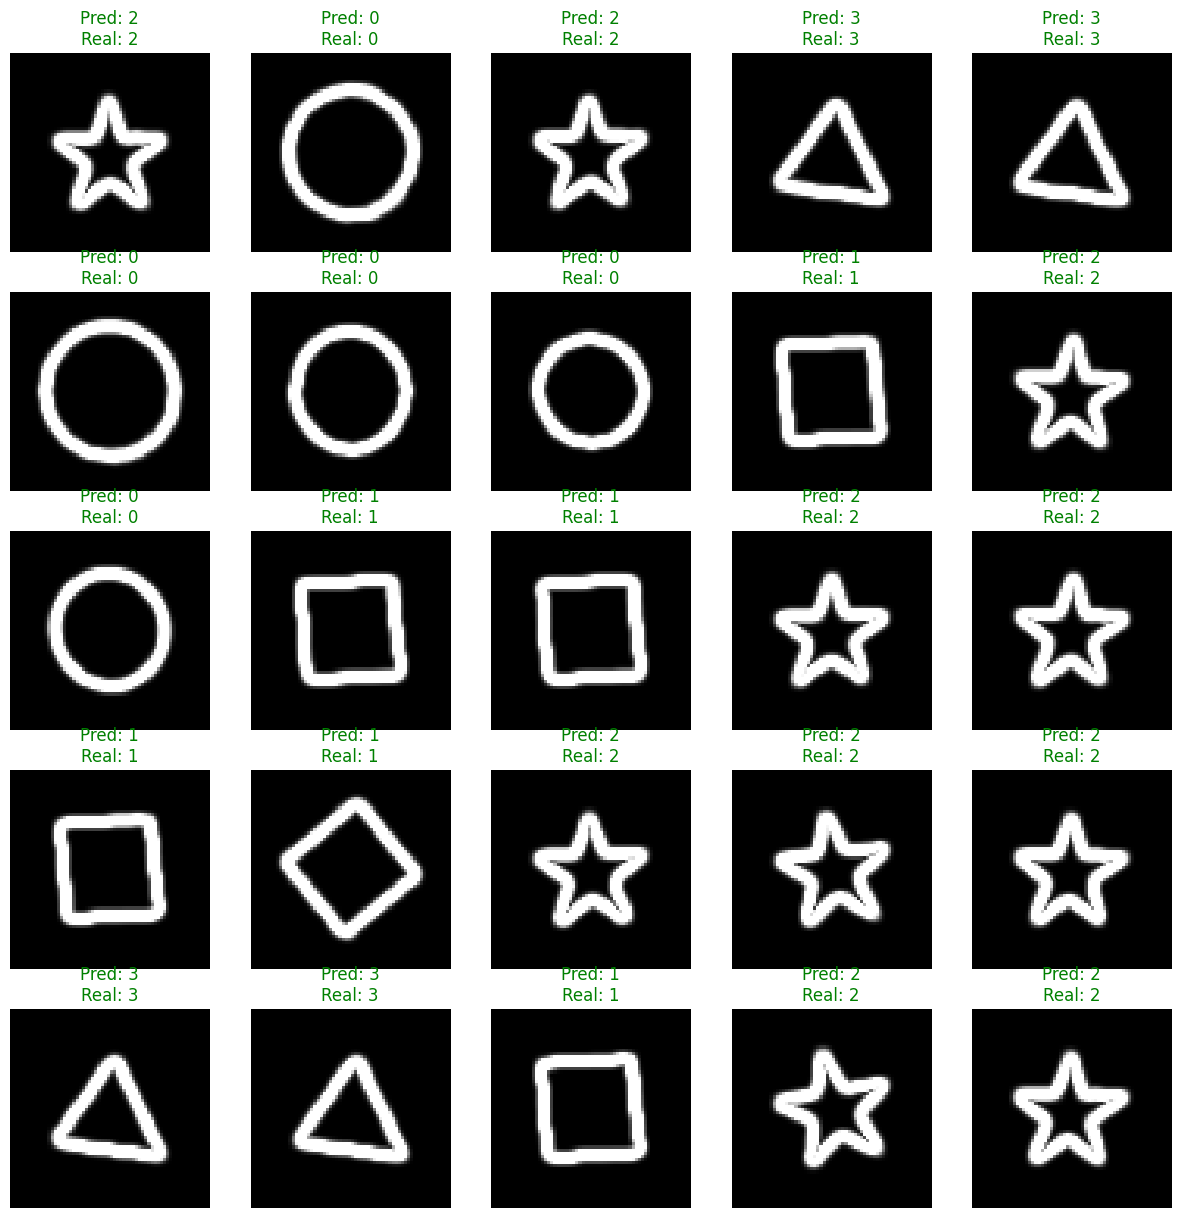

In [15]:
predictions=model.predict(X_test)
predicted_labels=np.argmax(predictions,axis=1)
true_labels=np.argmax(y_test,axis=1)

plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    color = 'green' if predicted_labels[i] == true_labels[i] else 'red'
    plt.title(f"Pred: {predicted_labels[i]}\nReal: {true_labels[i]}", color=color)
    plt.axis('off')
plt.show()